Chapter 26
# 计算、可视化成对距离
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
import itertools 
import numpy as np
import matplotlib as mpl
import seaborn as sns
import string
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [3]:
# 产生随机数
num = 26
np.random.seed(0)
data = np.random.randint(10 + 1, size=(num, 2))
labels = list(string.ascii_uppercase)

In [4]:
cmap = mpl.cm.get_cmap('RdYlBu_r')

C:\Users\capen\AppData\Local\Temp\ipykernel_32060\3594212526.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('RdYlBu_r')


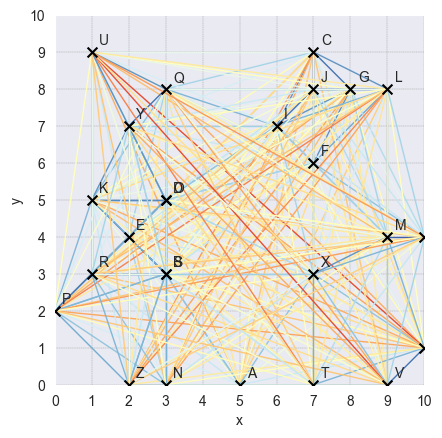

In [20]:
fig, ax = plt.subplots()

# 绘制成对线段
for i, d in enumerate(itertools.combinations(data, 2)):
    d_idx = euclidean(d[0], d[1])
    plt.plot([d[0][0], d[1][0]], [d[0][1], d[1][1]], color=cmap(d_idx/np.sqrt(2)/10), lw=1)
ax.scatter(data[:,0], data[:,1], marker='x', color='k', s=50, zorder=100)

# 添加标签
for i, txt in enumerate(labels):
    ax.annotate(txt,(data[i,0] + 0.2, data[i,1] + 0.2))

ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
plt.xlabel('x'); plt.ylabel('y')
ax.grid(ls='--',lw=0.25,color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/成对距离连线.svg', format='svg')

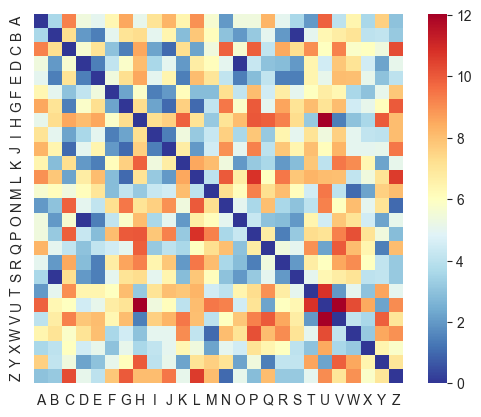

In [23]:
# 计算成对距离矩阵
pairwise_distances = distance_matrix(data, data)
fig, ax = plt.subplots()
sns.heatmap(pairwise_distances, cmap='RdYlBu_r', square=True, xticklabels=labels, yticklabels=labels, ax=ax)
fig.savefig('Figures/成对距离矩阵热图.svg', format='svg')